In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.stats as st

Set plot font size

In [2]:
FS = 18

Get dictionary with information about errors and p-values during convergent time steps

In [3]:
fname = './data/p3_p7_evolve_results/190211_errs_per_conv_ts_pr_0.005_g_1.1_niter_100.json'

In [4]:
with open(fname,'r') as f:
    c_err_results = json.loads(f.read())

In [5]:
# Inspect keys
print(c_err_results.keys())

dict_keys(['err_ncfs', 'err_npcs', 'p_nsyns', 'p_nsynspcf', 'p_npcspcf', 'p_ncfsppc', 'time_step', 'iteration'])


In [6]:
# Go through simulation iterations and compute the min, max, and best
# (where errors are minimized and p-values are maximized) time step for each
itercurr = []
min_c_ts = []
max_c_ts = []
mean_c_ts = []
best_c_ts = []

iters = list(set(c_err_results['iteration']))
for ic in iters:
    rowscurr = [i for i,q in enumerate(c_err_results['iteration']) if q == ic]
    encfscurr = [c_err_results['err_ncfs'][q] for q in rowscurr]
    enpcscurr = [c_err_results['err_npcs'][q] for q in rowscurr]
    pnsynscurr = [c_err_results['p_nsyns'][q] for q in rowscurr]
    pnsynspcfcurr = [c_err_results['p_nsynspcf'][q] for q in rowscurr]
    pnpcspcfcurr = [c_err_results['p_npcspcf'][q] for q in rowscurr]
    pncfsppccurr = [c_err_results['p_ncfsppc'][q] for q in rowscurr]
    tscurr = [c_err_results['time_step'][q] for q in rowscurr]
    
    itercurr.append(ic)
    min_c_ts.append(np.min(tscurr))
    max_c_ts.append(np.max(tscurr))
    mean_c_ts.append(np.mean(tscurr))
    
    b_encfs = [i for i,q in enumerate(encfscurr) if q == np.min(encfscurr)]
    b_enpcs = [i for i,q in enumerate(enpcscurr) if q == np.min(enpcscurr)]
    b_pnsyns = [i for i,q in enumerate(pnsynscurr) if q == np.max(pnsynscurr)]
    b_pnsynspcf = [i for i,q in enumerate(pnsynspcfcurr) if q == np.max(pnsynspcfcurr)]
    b_pnpcspcf = [i for i,q in enumerate(pnpcspcfcurr) if q == np.max(pnpcspcfcurr)]
    b_pncfsppc = [i for i,q in enumerate(pncfsppccurr) if q == np.max(pncfsppccurr)]
    
    tben = [tscurr[q] for q in b_encfs]
    tbep = [tscurr[q] for q in b_enpcs]
    tpnsyns = [tscurr[q] for q in b_pnsyns]
    tpnspcf = [tscurr[q] for q in b_pnsynspcf]
    tpnpcpcf = [tscurr[q] for q in b_pnpcspcf]
    tpncfppc = [tscurr[q] for q in b_pncfsppc]
    
    # Find the time step where most of these conditions are true
    b_ts = st.mode(tben + tbep + tpnsyns + tpnspcf + tpnpcpcf + tpncfppc)[0][0]
    best_c_ts.append(b_ts)

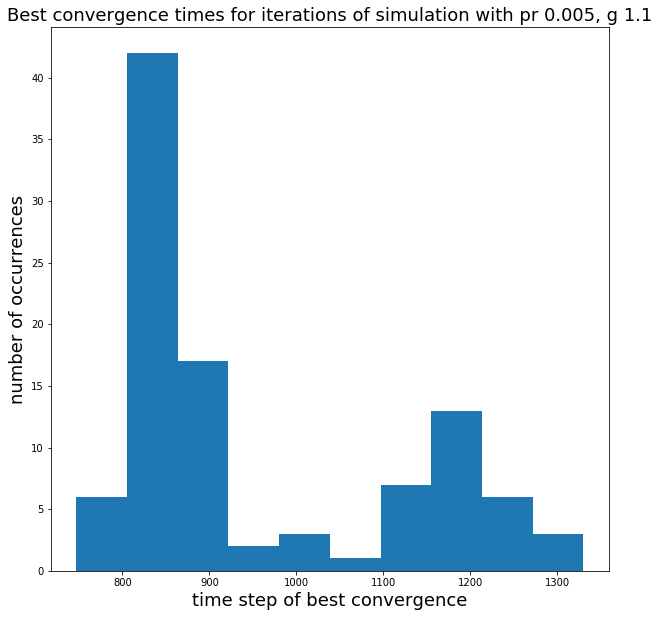

mean best convergence time = 954.68 +/- 16.235476057950468 time steps


In [7]:
plt.figure(figsize=(10,10))
plt.hist(best_c_ts)
plt.xlabel('time step of best convergence',fontsize=FS)
plt.ylabel('number of occurrences',fontsize=FS)
plt.title('Best convergence times for iterations of simulation with pr 0.005, g 1.1',fontsize=FS)
plt.show()
print('mean best convergence time = {0} +/- {1} time steps'.format(np.mean(best_c_ts),st.sem(best_c_ts)))

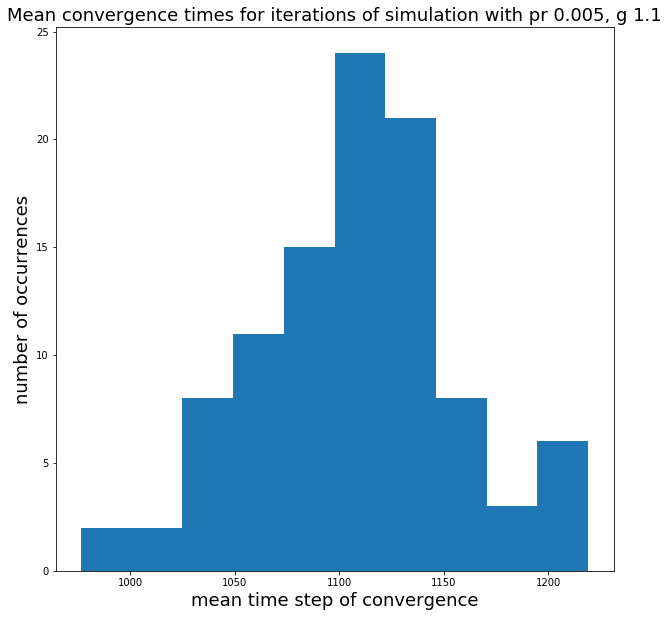

mean of mean convergent time steps = 1107.25


In [8]:
plt.figure(figsize=(10,10))
plt.hist(mean_c_ts)
plt.xlabel('mean time step of convergence',fontsize=FS)
plt.ylabel('number of occurrences',fontsize=FS)
plt.title('Mean convergence times for iterations of simulation with pr 0.005, g 1.1',fontsize=FS)
plt.show()
print('mean of mean convergent time steps = {0}'.format(np.mean(mean_c_ts)))

In [10]:
np.max(iters)

99